# Introduction:
This Exploratory Data Analysis (EDA) study analyzes the IEEE-CIS Fraud Detection dataset, which was acquired from the Vesta Corporation-hosted Kaggle competition of the IEEE Computational Intelligence Society. This dataset's main goal is to make it easier to identify and anticipate fraudulent online transactions by thoroughly analyzing transaction and identity-related data. Numerous transaction details are included, such as transaction amounts, card information, email domains, and other characteristics meant to differentiate between authentic and fraudulent activity. Python is used for this investigation, making use of data processing and visualization tools like Pandas, NumPy, Matplotlib, and Seaborn. To facilitate future modeling and prediction efforts in fraud detection scenarios, this EDA seeks to thoroughly examine the data, spot significant patterns, spot anomalies, and provide clear insights.

Since fraudulent transactions are uncommon but cause damage in real-world situations, fraud detection is an essential part of safe digital commerce systems. Machine learning models frequently find it difficult to accurately identify minority class occurrences due to the inherent class imbalance in such datasets. By using and contrasting several supervised learning models, such as K-Nearest Neighbors, Naive Bayes, Decision Tree, and Gradient Boosting, as well as cross-validation and hyperparameter tuning, this study addresses that difficulty. These methods seek to improve predicted robustness and accuracy, especially in identifying subtle patterns suspicious of fraud.

In [1]:
import pandas as pd
import numpy as np
from IPython.display import display  
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import csv
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

This cell imports necessary Python libraries for data manipulation, visualization, and machine learning—such as pandas, NumPy, scikit-learn, matplotlib, seaborn, and others.



In [2]:
# Define file paths
train_transaction_path = r"C:/Users/hnallagondu/Desktop/projects and resume/train_transaction.csv"
train_identity_path = r"C:/Users/hnallagondu/Desktop/projects and resume/train_identity.csv"
test_transaction_path = r"C:/Users/hnallagondu/Desktop/projects and resume/test_transaction.csv"
test_identity_path = r"C:/Users/hnallagondu/Desktop/projects and resume/test_identity.csv"

# Load Data
train_transaction = pd.read_csv(train_transaction_path, encoding="utf-8", delimiter=",", low_memory=False)
train_identity = pd.read_csv(train_identity_path, encoding="utf-8", delimiter=",", low_memory=False)
test_transaction = pd.read_csv(test_transaction_path, encoding="utf-8", delimiter=",", low_memory=False)
test_identity = pd.read_csv(test_identity_path, encoding="utf-8", delimiter=",", low_memory=False)

# Display first 5 rows of each dataset with headings
print("Train Transaction Data:")
display(train_transaction.head())

print("\nTrain Identity Data:")
display(train_identity.head())

print("\nTest Transaction Data:")
display(test_transaction.head())

print("\nTest Identity Data:")
display(test_identity.head())


Train Transaction Data:


,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0



Train Identity Data:


,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,...,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,...,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS



Test Transaction Data:


,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,3663549,18403224,31.95,W,10409,111.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3663550,18403263,49.00,W,4272,111.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3663551,18403310,171.00,W,4476,574.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3663552,18403310,284.95,W,10989,360.0,150.0,visa,166.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3663553,18403317,67.95,W,18018,452.0,150.0,mastercard,117.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



Test Identity Data:


,TransactionID,id-01,id-02,id-03,id-04,id-05,id-06,id-07,id-08,id-09,...,id-31,id-32,id-33,id-34,id-35,id-36,id-37,id-38,DeviceType,DeviceInfo
0,3663586,-45.0,280290.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,...,chrome 67.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,MYA-L13 Build/HUAWEIMYA-L13
1,3663588,0.0,3579.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 67.0 for android,24.0,1280x720,match_status:2,T,F,T,T,mobile,LGLS676 Build/MXB48T
2,3663597,-5.0,185210.0,NaN,NaN,1.0,0.0,NaN,NaN,NaN,...,ie 11.0 for tablet,NaN,NaN,NaN,F,T,T,F,desktop,Trident/7.0
3,3663601,-45.0,252944.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 67.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,MYA-L13 Build/HUAWEIMYA-L13
4,3663602,-95.0,328680.0,NaN,NaN,7.0,-33.0,NaN,NaN,NaN,...,chrome 67.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,SM-G9650 Build/R16NW


This cell defines the file paths for the training and testing datasets (transaction and identity files), loads them into pandas DataFrames, and displays the first few rows of each to verify successful loading.

In [3]:
# Merge transaction and identity data
train_df = train_transaction.merge(train_identity, on="TransactionID", how="left")
test_df = test_transaction.merge(test_identity, on="TransactionID", how="left")

This cell merges the transaction and identity datasets for both training and testing sets using the TransactionID column as the key. The result is a consolidated dataset for each.



In [4]:
# Descriptive Analysis ( Train Summary statistics)
print("Train Summary Statistics of Numerical Features:")
train_summary = train_df.describe()
display(train_summary)

Train Summary Statistics of Numerical Features:


,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,...,id_17,id_18,id_19,id_20,id_21,id_22,id_24,id_25,id_26,id_32
count,5.905400e+05,590540.000000,5.905400e+05,590540.000000,590540.000000,581607.000000,588975.000000,586281.000000,524834.000000,524834.000000,...,139369.000000,45113.000000,139318.000000,139261.000000,5159.000000,5169.000000,4747.000000,5132.000000,5163.000000,77586.000000
mean,3.282270e+06,0.034990,7.372311e+06,135.027176,9898.734658,362.555488,153.194925,199.278897,290.733794,86.800630,...,189.451377,14.237337,353.128174,403.882666,368.269820,16.002708,12.800927,329.608924,149.070308,26.508597
std,1.704744e+05,0.183755,4.617224e+06,239.162522,4901.170153,157.793246,11.336444,41.244453,101.741072,2.690623,...,30.375360,1.561302,141.095343,152.160327,198.847038,6.897665,2.372447,97.461089,32.101995,3.737502
min,2.987000e+06,0.000000,8.640000e+04,0.251000,1000.000000,100.000000,100.000000,100.000000,100.000000,10.000000,...,100.000000,10.000000,100.000000,100.000000,100.000000,10.000000,11.000000,100.000000,100.000000,0.000000
25%,3.134635e+06,0.000000,3.027058e+06,43.321000,6019.000000,214.000000,150.000000,166.000000,204.000000,87.000000,...,166.000000,13.000000,266.000000,256.000000,252.000000,14.000000,11.000000,321.000000,119.000000,24.000000
50%,3.282270e+06,0.000000,7.306528e+06,68.769000,9678.000000,361.000000,150.000000,226.000000,299.000000,87.000000,...,166.000000,15.000000,341.000000,472.000000,252.000000,14.000000,11.000000,321.000000,149.000000,24.000000
75%,3.429904e+06,0.000000,1.124662e+07,125.000000,14184.000000,512.000000,150.000000,226.000000,330.000000,87.000000,...,225.000000,15.000000,427.000000,533.000000,486.500000,14.000000,15.000000,371.000000,169.000000,32.000000
max,3.577539e+06,1.000000,1.581113e+07,31937.391000,18396.000000,600.000000,231.000000,237.000000,540.000000,102.000000,...,229.000000,29.000000,671.000000,661.000000,854.000000,44.000000,26.000000,548.000000,216.000000,32.000000


This cell provides a statistical summary (like mean, standard deviation, min, max) of all numerical features in the training dataset to understand the data distribution and detect anomalies.

In [5]:
# Descriptive Analysis ( Test Summary statistics)
print("Test Summary Statistics of Numerical Features:")
test_summary = test_df.describe()
display(test_summary)

Test Summary Statistics of Numerical Features:


,TransactionID,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,dist1,...,id-17,id-18,id-19,id-20,id-21,id-22,id-24,id-25,id-26,id-32
count,5.066910e+05,5.066910e+05,506691.000000,506691.000000,498037.000000,503689.000000,502144.000000,441082.000000,441082.000000,215474.000000,...,135966.000000,50875.000000,135906.000000,135633.000000,5059.000000,5062.000000,4740.000000,5039.000000,5047.000000,70671.000000
mean,3.916894e+06,2.692994e+07,134.725568,9957.222175,363.735379,153.543409,200.162975,291.846514,86.723412,87.065270,...,191.070341,14.795735,350.122982,408.886230,507.727021,15.336823,13.166667,332.043064,152.752923,26.217939
std,1.462692e+05,4.756507e+06,245.779822,4884.960969,158.688653,12.443013,40.562461,102.062730,2.987328,314.131694,...,30.749535,2.318496,139.140824,158.971756,227.371061,5.618032,3.222440,86.356683,31.916995,3.601046
min,3.663549e+06,1.840322e+07,0.018000,1001.000000,100.000000,100.000000,100.000000,100.000000,10.000000,0.000000,...,100.000000,11.000000,100.000000,100.000000,100.000000,11.000000,10.000000,100.000000,100.000000,8.000000
25%,3.790222e+06,2.277154e+07,40.000000,6019.000000,207.000000,150.000000,166.000000,204.000000,87.000000,3.000000,...,166.000000,13.000000,266.000000,256.000000,252.000000,14.000000,11.000000,321.000000,137.000000,24.000000
50%,3.916894e+06,2.720466e+07,67.950000,9803.000000,369.000000,150.000000,226.000000,299.000000,87.000000,8.000000,...,166.000000,15.000000,321.000000,484.000000,576.000000,14.000000,11.000000,321.000000,147.000000,24.000000
75%,4.043566e+06,3.134856e+07,125.000000,14276.000000,512.000000,150.000000,226.000000,330.000000,87.000000,20.000000,...,225.000000,15.000000,427.000000,549.000000,711.000000,14.000000,15.000000,355.000000,182.000000,32.000000
max,4.170239e+06,3.421434e+07,10270.000000,18397.000000,600.000000,232.000000,237.000000,540.000000,102.000000,8081.000000,...,228.000000,29.000000,670.000000,660.000000,854.000000,44.000000,26.000000,549.000000,216.000000,48.000000


This cell generates and displays descriptive statistics (such as count, mean, standard deviation, min, and max) for all numerical features in the test dataset (test_df). This summary helps in understanding the distribution, central tendency, and spread of values in the test data.



In [6]:
# Check for missing values in training data
print("Missing values in training data:")
missing_train = train_df.isnull().sum()
display(missing_train[missing_train > 0].sort_values(ascending=False))

# Check for missing values in test data
print("\nMissing values in test data:")
missing_test = test_df.isnull().sum()
display(missing_test[missing_test > 0].sort_values(ascending=False))


Missing values in training data:


id_24    585793
id_25    585408
id_07    585385
id_08    585385
id_21    585381
          ...  
V285         12
V284         12
V280         12
V279         12
V312         12
Length: 414, dtype: int64


Missing values in test data:


id-24    501951
id-25    501652
id-26    501644
id-08    501632
id-07    501632
          ...  
V293          3
C14           3
V319          3
V292          3
V303          3
Length: 385, dtype: int64

In [7]:
# Drop columns with more than 30% missing values
threshold = 0.3
train_missing_ratio = train_df.isnull().mean()
test_missing_ratio = test_df.isnull().mean()

# Identify columns to drop
cols_to_drop_train = train_missing_ratio[train_missing_ratio > threshold].index
cols_to_drop_test = test_missing_ratio[test_missing_ratio > threshold].index

# Union of both lists
cols_to_drop = set(cols_to_drop_train).union(set(cols_to_drop_test))

# Filter only existing columns for each DataFrame
cols_to_drop_train_filtered = [col for col in cols_to_drop if col in train_df.columns]
cols_to_drop_test_filtered = [col for col in cols_to_drop if col in test_df.columns]

# Drop columns
train_df_cleaned = train_df.drop(columns=cols_to_drop_train_filtered)
test_df_cleaned = test_df.drop(columns=cols_to_drop_test_filtered)

print(f"Columns dropped from training set: {len(cols_to_drop_train_filtered)}")
print(f"Columns dropped from test set: {len(cols_to_drop_test_filtered)}")


Columns dropped from training set: 233
Columns dropped from test set: 233




This cell identifies and drops columns in both training and test datasets that have more than 30% missing values. This threshold ensures that features with too much missing data are excluded, improving data quality while retaining useful information.


In [8]:
# ------------------- Data Cleaning -------------------
# Handle missing values correctly for numeric columns
train_df.update(train_df.select_dtypes(include=[np.number]).apply(lambda x: x.fillna(x.median())))
test_df.update(test_df.select_dtypes(include=[np.number]).apply(lambda x: x.fillna(x.median())))

# Handle missing categorical values by filling with mode
train_df.update(train_df.select_dtypes(include=["object"]).apply(lambda x: x.fillna(x.mode()[0])))
test_df.update(test_df.select_dtypes(include=["object"]).apply(lambda x: x.fillna(x.mode()[0])))

This cell performs data cleaning by handling missing values in both the training and test datasets:

Numeric columns: Missing values are filled with the median of each column. This is a robust imputation method that reduces the influence of outliers.
Categorical columns: Missing values are filled with the mode (most frequent value) of each column. This maintains the most common category where data is missing.

In [9]:
# Remove duplicate records if any
train_df.drop_duplicates(inplace=True)
test_df.drop_duplicates(inplace=True)

This cell removes any duplicate rows from both the training and test datasets using drop_duplicates(). Although duplicates are uncommon in transactional data, this step ensures the dataset is clean and avoids potential data leakage or bias during model training.



In [10]:
# Detect and handle outliers using IQR method
Q1 = train_df['TransactionAmt'].quantile(0.25)
Q3 = train_df['TransactionAmt'].quantile(0.75)
IQR = Q3 - Q1
train_df = train_df[(train_df['TransactionAmt'] >= (Q1 - 1.5 * IQR)) & 
                      (train_df['TransactionAmt'] <= (Q3 + 1.5 * IQR))]

This cell detects and removes outliers in the TransactionAmt feature of the training dataset using the Interquartile Range (IQR) method.

It calculates the first quartile (Q1) and third quartile (Q3), then computes the IQR.
Any transaction amount outside the range [Q1 - 1.5*IQR, Q3 + 1.5*IQR] is considered an outlier and removed.
This helps improve model robustness by eliminating extreme values that could skew learning.

In [11]:
# ------------------- Data Preprocessing -------------------
# Scaling TransactionAmt
scaler = StandardScaler()
train_df.loc[:, 'TransactionAmt_Scaled'] = scaler.fit_transform(train_df[['TransactionAmt']])
test_df.loc[:, 'TransactionAmt_Scaled'] = scaler.transform(test_df[['TransactionAmt']])

This cell standardizes the TransactionAmt feature in both training and test datasets using z-score normalization with StandardScaler.

It creates a new column, TransactionAmt_Scaled, where values are rescaled to have a mean of 0 and standard deviation of 1.
This is an important preprocessing step for many machine learning models that are sensitive to feature scale, such as logistic regression, SVMs, and gradient-based algorithms.

In [12]:
# Encode categorical variables (e.g., card type)
if 'card4' in train_df.columns:
    train_df = pd.get_dummies(train_df, columns=['card4'], drop_first=True)
    test_df = pd.get_dummies(test_df, columns=['card4'], drop_first=True)

This cell performs one-hot encoding on the card4 categorical column (e.g., card type like Visa, Mastercard) in both training and test datasets using pd.get_dummies().

The drop_first=True parameter avoids multicollinearity by dropping the first category as a baseline.
This encoding transforms the categorical column into separate binary columns, allowing machine learning models to interpret the feature numerically.

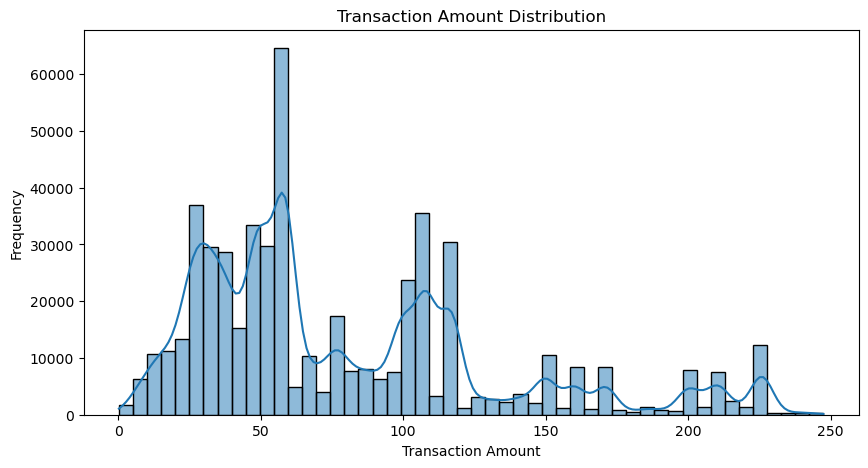

In [13]:
# ------------------- Data Analysis and Visualization -------------------
# Univariate Analysis: Histogram and density plots for TransactionAmt
plt.figure(figsize=(10, 5))
sns.histplot(train_df['TransactionAmt'], bins=50, kde=True)
plt.title("Transaction Amount Distribution")
plt.xlabel("Transaction Amount")
plt.ylabel("Frequency")
plt.show()

Transaction Amount Distribution Analysis:

The transaction amount distribution is depicted by the KDE plot and histogram. Because of the distribution's right skew, more transactions take place at lower values, while fewer transactions have greater amounts. This implies that the majority of transactions are very little purchases, with sporadic high-value transactions.

Transaction amounts that happen more frequently are indicated by distinct peaks in the KDE curve and histogram. Around 50 transactions, there is the highest concentration, followed by other noteworthy peaks at 10, 20, 70, 100, and 150. These recurrent numbers imply typical transaction quantities, which may be a reflection of conventional corporate procedures, pricing schemes, or consumer purchasing trends. Higher transaction quantities are present, as indicated by the distribution's long tail, although they are far less common.

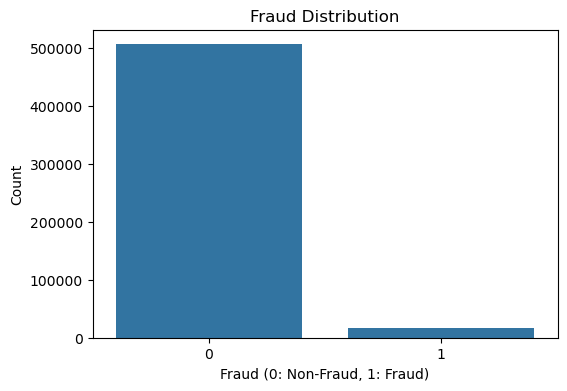

In [14]:
# Fraud distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='isFraud', data=train_df)
plt.title("Fraud Distribution")
plt.xlabel("Fraud (0: Non-Fraud, 1: Fraud)")
plt.ylabel("Count")
plt.show()

Fraud Distribution Analysis:

The distribution of fraudulent (1) and non-fraudulent (0) transactions is shown visually in the bar plot. The much wider bar for category 0 indicates that most transactions are not fraudulent. The dataset exhibits a significant class imbalance, as seen by the significantly lower incidence of fraudulent transactions (category 1).

This contrast suggests that, in comparison to authentic transactions, fraudulent ones are uncommon. These class differences are prevalent in datasets used for fraud detection and might affect how well machine learning models perform, possibly producing biased predictions that favor the dominant class.

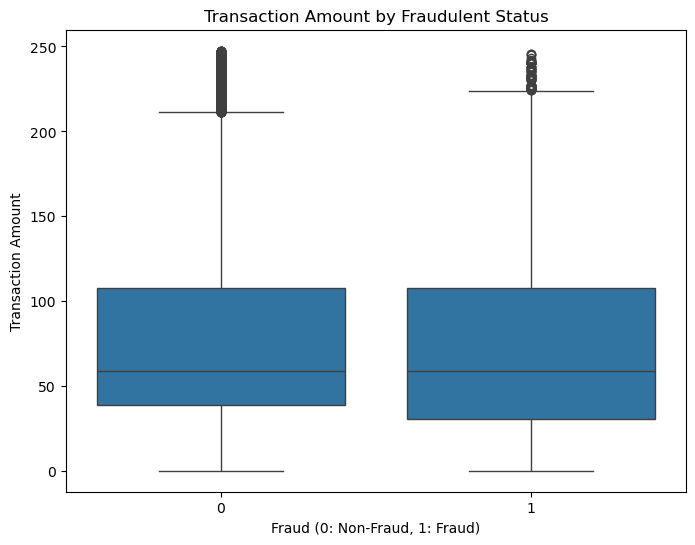

In [15]:
# Bivariate Analysis: Boxplot comparing fraud and non-fraud transactions by amount
plt.figure(figsize=(8, 6))
sns.boxplot(x='isFraud', y='TransactionAmt', data=train_df)
plt.title("Transaction Amount by Fraudulent Status")
plt.xlabel("Fraud (0: Non-Fraud, 1: Fraud)")
plt.ylabel("Transaction Amount")
plt.show()

Transaction Amount by Fraudulent Status:

Transaction amount distributions for fraudulent (1) and non-fraudulent (0) transactions are contrasted in the boxplot. It indicates that the median transaction amount is comparable for both groups, suggesting that transaction value is not always a reliable indicator of fraud or non-fraud.

Both fraud and non-fraud transactions have comparable interquartile ranges (IQRs), which indicates that the majority of transactions fall within the same range. Both groups do, however, show anomalies, especially for high-value transactions over 200, which may indicate rare but valid big purchases or possible fraud efforts.

This graphic emphasizes the necessity of examining extra variables for efficient fraud detection by implying that illegal transactions are not always worth more or less than legitimate ones.

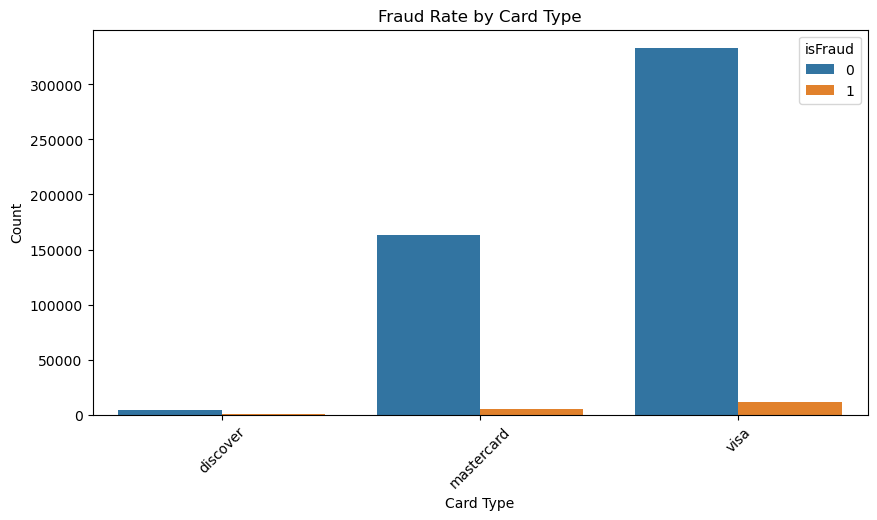

In [16]:
# Bivariate Analysis: Fraud rate by card type
card4_columns = [col for col in train_df.columns if col.startswith('card4_')]
if len(card4_columns) > 0:
    # Melt one-hot encoded card4 columns into a single categorical column
    train_df_melted = train_df.melt(id_vars=['isFraud'], value_vars=card4_columns, var_name='card4', value_name='value')
    train_df_filtered = train_df_melted[train_df_melted['value'] == 1].copy()
    train_df_filtered.loc[:, 'card4'] = train_df_filtered['card4'].str.replace('card4_', '', regex=True)

    # Create the countplot
    plt.figure(figsize=(10, 5))
    sns.countplot(data=train_df_filtered, x='card4', hue='isFraud')
    plt.title("Fraud Rate by Card Type")
    plt.xlabel("Card Type")
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()
else:
    print("Warning: No 'card4' related columns found in the dataset!")

## Fraud Rate by Card Type:

The distribution of both fraudulent and non-fraudulent transactions for each type of card is shown graphically by the bar plot. Visa and Mastercard account for most of the dataset's transactions, whilst Discover accounts for a far smaller percentage.

The frequency of fraudulent transactions (orange) is significantly lower than that of non-fraudulent transactions (blue) for all card types. Different card types have different fraud percentages, though, with Visa and Mastercard having comparatively greater fraud rates than Discover. This implies that the amount of transactions, card usage trends, or security protocols put in place by various card issuers may all have an impact on fraud incidents.

When examining fraud trends, this picture emphasizes the need of taking card type into account because certain card networks may be more frequently targeted by fraudulent activity than others.

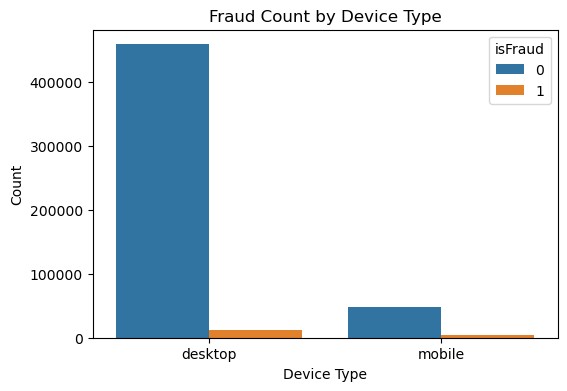

In [17]:
if 'DeviceType' in train_df.columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=train_df, x='DeviceType', hue='isFraud')
    plt.title("Fraud Count by Device Type")
    plt.xlabel("Device Type")
    plt.ylabel("Count")
    plt.show()



This visualization shows how fraud is distributed across different `DeviceType` categories (e.g., mobile vs desktop). It helps assess whether fraud is more prevalent on specific platforms.


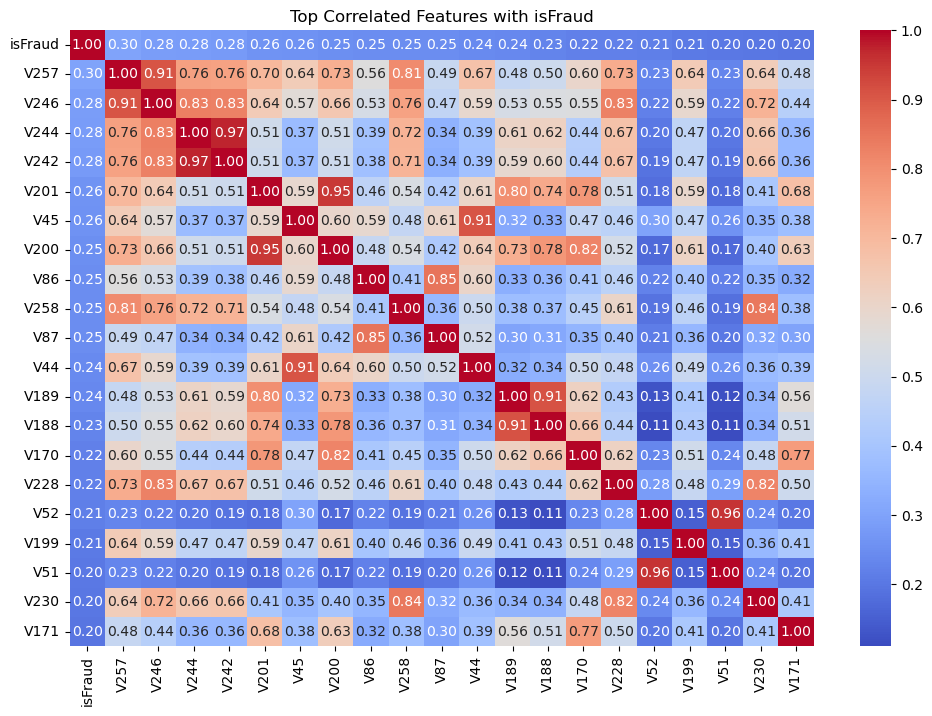

In [18]:
# Multivariate Analysis: Reduced Correlation Heatmap for Top Features
plt.figure(figsize=(12, 8))

# Drop non-informative numeric columns
exclude_cols = ['TransactionID', 'TransactionDT']
numeric_cols = [col for col in train_df.select_dtypes(include=[np.number]).columns if col not in exclude_cols]

# Compute full correlation matrix
corr_matrix = train_df[numeric_cols].corr()

# Focus on top 20 features most correlated with 'isFraud'
top_corr_features = corr_matrix['isFraud'].abs().sort_values(ascending=False).head(21).index  # 21 includes 'isFraud' itself
top_corr_matrix = train_df[top_corr_features].corr()

# Plot reduced heatmap
sns.heatmap(top_corr_matrix, cmap='coolwarm', annot=True, fmt=".2f")
plt.title("Top Correlated Features with isFraud")
plt.show()


The heatmap visually represents the correlation between the dataset’s numerical features. The color intensity indicates the strength and direction of correlation:

Dark red: strong positive correlation
Dark blue: strong negative correlation
Lighter shades: weak or no correlation
Most features display weak correlations, which appear as light colors in the heatmap. This suggests that many variables are independent, contributing unique information to the model.
Some clusters show strong correlations, especially along the diagonal or in feature groups—these may indicate redundant or highly related features. A few features show negative correlations, signaling inverse relationships that could be valuable for predictive modeling.

In [19]:
#save cleaned and processed data for further use
train_df.to_csv("fraud_trends_analysis_train.csv",index=False)
test_df.to_csv("fraud_trends_analysis_test.csv",index=false)

NameError: name 'false' is not defined